In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows and columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',-1)

C:\Users\nilab\AppData\Local\Temp/ipykernel_6276/1152688960.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth',-1)


In [4]:
df = pd.read_csv('F:\IPL_ball_by_ball_updated.csv')
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,4/18/2008,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,4/18/2008,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df), len(df.columns)

(225953, 22)

In [6]:
df["start_date"] = pd.to_datetime(df["start_date"])
df["Year"] = df["start_date"].dt.year
df.head(2)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Year
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [7]:
df.tail(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Year
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,12.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [8]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [12]:
MS_df = df[df['striker'] == 'MS Dhoni']
MS_df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Year
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2008
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [14]:
msd_df = MS_df[(MS_df.Year >= 2018) & (MS_df.Year <= 2022)]
msd_df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Year
150463,1136561,2018,2018-04-07,Wankhede Stadium,2,6.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150472,1136561,2018,2018-04-07,Wankhede Stadium,2,7.7,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150473,1136561,2018,2018-04-07,Wankhede Stadium,2,8.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150475,1136561,2018,2018-04-07,Wankhede Stadium,2,8.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2018
150485,1136561,2018,2018-04-07,Wankhede Stadium,2,7.6,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [15]:
len(msd_df.match_id.unique())


62

In [16]:

msd_df = msd_df[msd_df.ball >= 14.6] 
msd_df.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Year
151475,1136565,2018,2018-04-10,MA Chidambaram Stadium,2,16.1,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,SW Billings,PP Chawla,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
151477,1136565,2018,2018-04-10,MA Chidambaram Stadium,2,16.3,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,SW Billings,PP Chawla,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
151478,1136565,2018,2018-04-10,MA Chidambaram Stadium,2,16.4,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,SW Billings,PP Chawla,0,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN,2018


In [17]:
sum(msd_df[('runs_off_bat')])

976

In [18]:
len(msd_df)

612

In [19]:
SR = ((sum(msd_df[('runs_off_bat')])) / (len(msd_df)))*100
SR

159.47712418300654

In [20]:
sum(msd_df.runs_off_bat == 4)

71

In [21]:
len(msd_df[msd_df.player_dismissed == "MS Dhoni"])

24

In [24]:
df = df[(df.Year >= 2018) & (df.Year <= 2022)]
df = df[df.ball >= 14.6] 
df.head(5)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Year
164802,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,14.6,Chennai Super Kings,Royal Challengers Bangalore,KM Jadhav,RA Jadeja,Mohammed Siraj,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164803,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,15.1,Chennai Super Kings,Royal Challengers Bangalore,KM Jadhav,RA Jadeja,UT Yadav,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164804,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,15.2,Chennai Super Kings,Royal Challengers Bangalore,RA Jadeja,KM Jadhav,UT Yadav,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164805,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,15.3,Chennai Super Kings,Royal Challengers Bangalore,RA Jadeja,KM Jadhav,UT Yadav,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164806,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,15.4,Chennai Super Kings,Royal Challengers Bangalore,KM Jadhav,RA Jadeja,UT Yadav,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


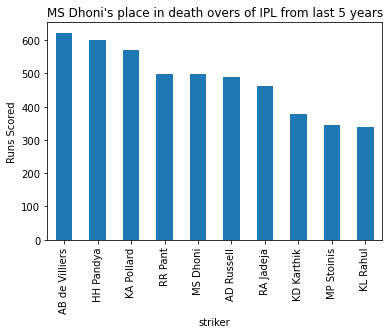

In [29]:
df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10)
df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title("MS Dhoni's place in death overs of IPL from last 5 years")
plt.xlabel('striker')
plt.ylabel('Runs Scored')
plt.show()


In [ ]:
#From Above Bar Plot we can say that last season for Him and his team was not as good but still MS Dhoni is in top 5 